In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm

import random
from math import sin, cos, sqrt, atan2, radians
from ease_grid import EASE2_grid
grid_size = 36000
egrid = EASE2_grid(grid_size)
import time
from impacts import distance, IMPAaCS

In [2]:
# Set the size bins
max_diameter=330
diam_bins = [5, 10, 50, 100]
diam_labs = ['005', '005-009', '010-050', '050-100', '100+']
diam_range = {'005':[1,5],'005-009':[5,9],'010-050':[10,50],'050-100':[50,100],'100+':[100,max_diameter]}
lambda_start = {'005':1,'005-009':1.1,'010-050':1.2,'050-100':1.4,'100+':1.8}
lambda_end = {'005':2,'005-009':4,'010-050':8,'050-100':16,'100+':32}

In [3]:
# Make dictionary with size bins and frequency
with open('sfd.csv', 'r') as f:
    freqs = pd.read_csv(f).groupby('D').sum()
los_dict = {i:0 for i in diam_labs}
his_dict = {i:0 for i in diam_labs}
for i in freqs.index.values:
    for j in range(len(diam_bins)):
        if i < diam_bins[j]:
            los_dict[diam_labs[j]] += freqs.loc[i,'low']
            his_dict[diam_labs[j]] += freqs.loc[i,'high']
            break
        elif i >= diam_bins[-1]:
            los_dict[diam_labs[-1]] += freqs.loc[i,'low']
            his_dict[diam_labs[-1]] += freqs.loc[i,'high']
            break
df_freq = pd.DataFrame.from_dict({'high':his_dict, 'low':los_dict, 
                                  'lambda_start':lambda_start, 'lambda_end':lambda_end})
df_freq['frequency_factor'] = [0.1,0.2,0.3,0.6,0.8]
df_freq

,high,low,lambda_start,lambda_end,frequency_factor
005,16950000,1695000,1.0,2,0.1
005-009,855000,85500,1.1,4,0.2
010-050,146100,14610,1.2,8,0.3
050-100,8700,870,1.4,16,0.6
100+,3050,305,1.8,32,0.8


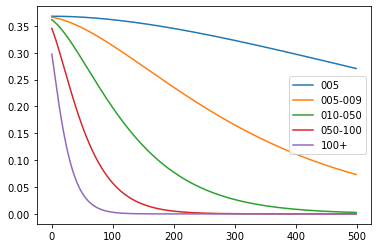

total impacts 2408959.0
impacts by diameter {'005': 2045308.0, '005-009': 336883.0, '010-050': 23637.0, '050-100': 1158.0, '100+': 1973.0}
fraction of total {'005': 0.85, '005-009': 0.14, '010-050': 0.01, '050-100': 0.0, '100+': 0.0}


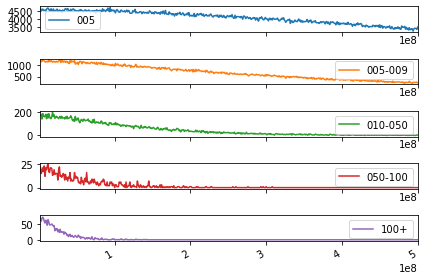

,high,low,lambda_start,lambda_end,frequency_factor,total
005,16950000,1695000,1.0,2,0.000081,2045308.0
005-009,855000,85500,1.1,4,0.000310,336883.0
010-050,146100,14610,1.2,8,0.002068,23637.0
050-100,8700,870,1.4,16,0.017766,1158.0
100+,3050,305,1.8,32,0.003999,1973.0


In [4]:
t_total=500

fivehundredmillion = 500000000
freq_factor = fivehundredmillion/t_total

not_converged=True
while not_converged:

    pp = {x:np.zeros(t_total) for x in diam_labs}
    l = {x:np.linspace(y,z,t_total) for x,y,z in zip(diam_labs,df_freq['lambda_start'],df_freq['lambda_end'])}

    for D in diam_labs:
        pp[D] = l[D]*np.exp(-l[D])

    df = pd.DataFrame(data=pp)
    hits = {d:np.zeros(t_total) for d in diam_labs}

    # Main loop through time. Calculate the total number of impacts of each diameter at each time step
    for t in range(0,t_total):
        for D in diam_labs:
            hits[D][t] = np.floor(np.random.poisson(pp[D][t] / df_freq.loc[D, 'frequency_factor']))


    total_sum = np.sum([hits[d] for d in diam_labs])
    sums = {d:np.sum(hits[d]) for d in diam_labs}
    frac = {d:np.round(np.sum(hits[d])/total_sum,2) for d in diam_labs}
    
    for d in diam_labs:
        df_freq.loc[d,'total']=sums[d]
    
    good_numbers = 0
    for d in diam_labs:
        if df_freq.loc[d,'total'] < df_freq.loc[d,'low']:
            df_freq.loc[d,'frequency_factor'] = df_freq.loc[d,'frequency_factor']*random.random()
        elif df_freq.loc[d,'total'] > df_freq.loc[d,'high']:
            df_freq.loc[d,'frequency_factor'] = df_freq.loc[d,'frequency_factor']*(1+random.random())
        else:
            good_numbers+=1
    if good_numbers == df_freq.shape[0]:
        not_converged = False
    
    
    
plt.plot(df)
plt.legend(df.columns.values)
plt.show()
print('total impacts', total_sum)
print('impacts by diameter', sums)
print('fraction of total', frac)
plot_time = np.linspace(0,fivehundredmillion,t_total+1)[1:]
df = pd.DataFrame(data=hits, index=plot_time)
df.plot(subplots=True)
plt.tight_layout()
plt.show()
df_freq

In [5]:
list_impacts_export = list(range(0,500,50))
list_impacts_export.append(499)

plotting SiO2  map for layers [0], and distribution for layer 0


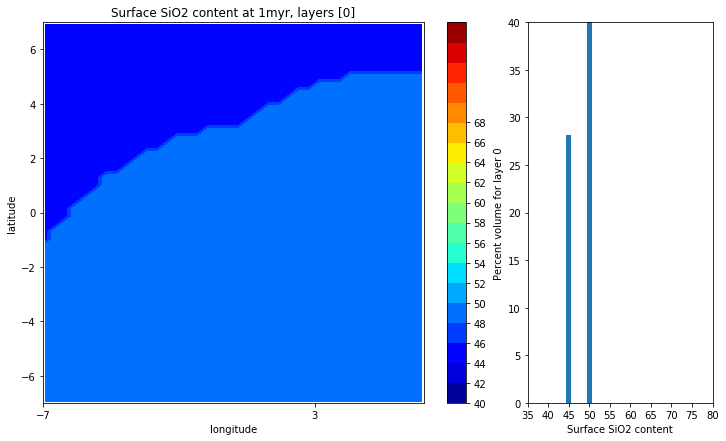

45    28.105263
50    71.894737
Name: 0, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


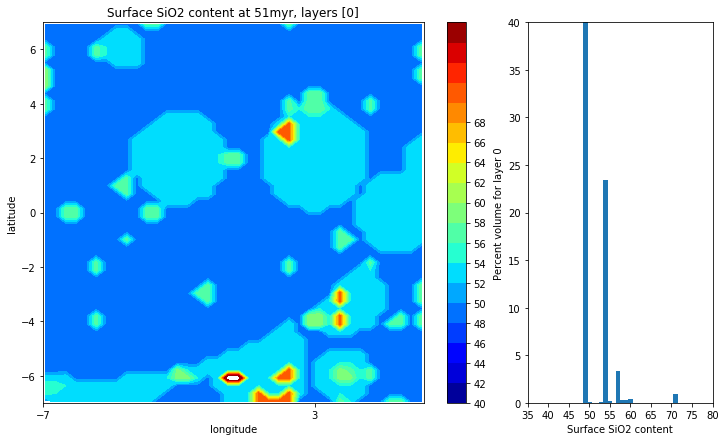

45          NaN
50     0.052632
58     0.315789
59     0.315789
65          NaN
51          NaN
55     0.157895
63          NaN
49    71.000000
53     0.105263
54    23.368421
57     3.315789
72          NaN
60     0.368421
69          NaN
48          NaN
71     0.894737
52          NaN
70          NaN
87     0.105263
Name: 50, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


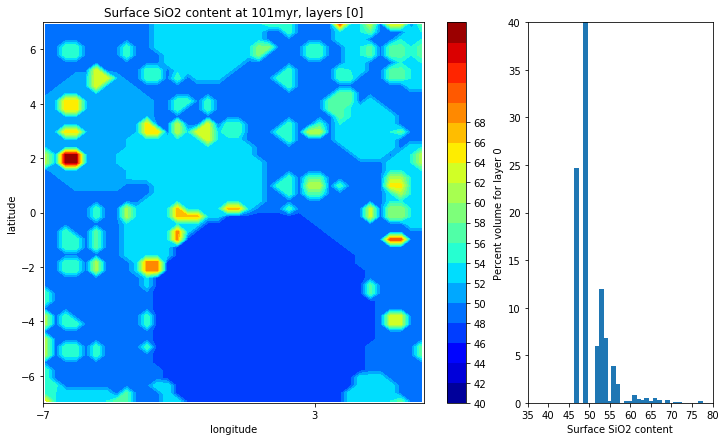

45          NaN
50          NaN
58          NaN
59     0.157895
65     0.157895
51          NaN
55     0.157895
63     0.315789
49    40.473684
53    12.000000
54     6.842105
57     2.000000
72     0.105263
60     0.210526
69     0.315789
48          NaN
71     0.052632
52     5.947368
70          NaN
87          NaN
64     0.526316
74          NaN
62     0.368421
56     3.842105
61     0.842105
66     0.473684
77     0.210526
67     0.315789
47    24.684211
78          NaN
Name: 100, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


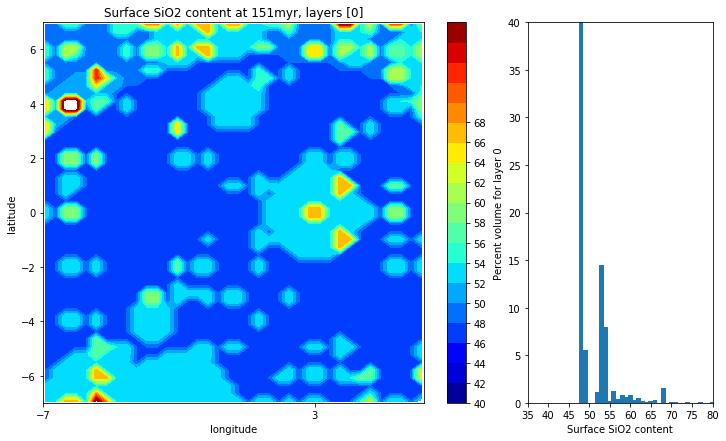

45          NaN
50          NaN
58     0.789474
59     0.578947
65     0.210526
51          NaN
55     0.157895
63     0.157895
49     5.526316
53    14.526316
54     7.947368
57     0.421053
72          NaN
60     0.842105
69          NaN
48    63.000000
71     0.105263
52     1.105263
70     0.105263
87          NaN
64     0.105263
74     0.105263
62     0.526316
56     1.210526
61     0.315789
66     0.315789
77     0.105263
67          NaN
47          NaN
78          NaN
85     0.210526
68     1.578947
80     0.052632
Name: 150, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


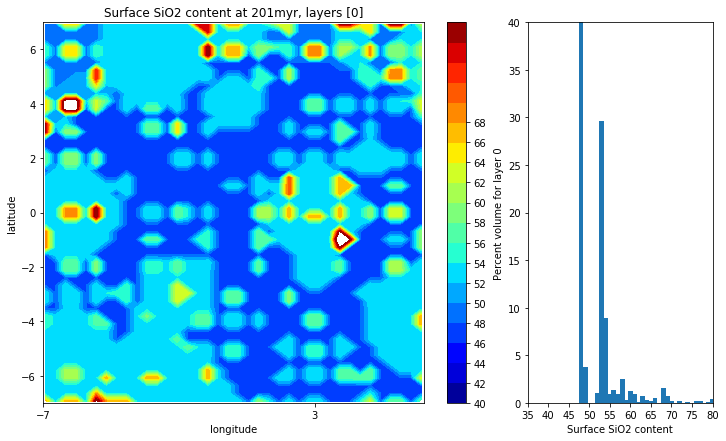

45          NaN
50          NaN
58     2.526316
59     0.263158
65     0.210526
51          NaN
55     0.894737
63     0.684211
49     3.736842
53    29.578947
54     8.947368
57     0.947368
72     0.157895
60     1.263158
69     0.684211
48    42.894737
71          NaN
52     1.000000
70     0.210526
87          NaN
64     0.263158
74     0.105263
62     0.105263
56     1.368421
61     0.947368
66     0.473684
77     0.210526
67          NaN
47          NaN
78          NaN
85     0.210526
68     1.578947
80     0.421053
83          NaN
79     0.105263
95     0.052632
76     0.157895
Name: 200, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


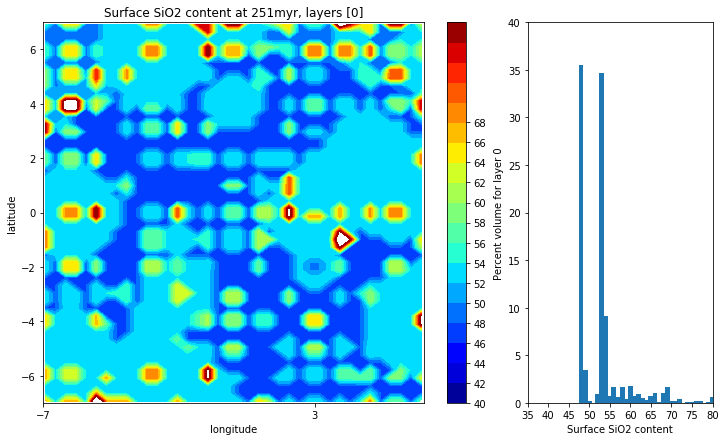

45          NaN
50     0.210526
58     1.684211
59     0.368421
65     0.684211
51          NaN
55     0.684211
63     0.473684
49     3.421053
53    34.631579
54     9.105263
57     0.631579
72     0.368421
60     1.736842
69     1.684211
48    35.473684
71     0.210526
52     0.947368
70     0.210526
87          NaN
64     0.263158
74     0.105263
62     0.947368
56     1.631579
61     0.736842
66     1.000000
77     0.157895
67     0.105263
47          NaN
78          NaN
85     0.210526
68     1.000000
80     0.578947
83     0.210526
79     0.105263
95     0.105263
76     0.157895
94     0.052632
75     0.105263
Name: 250, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


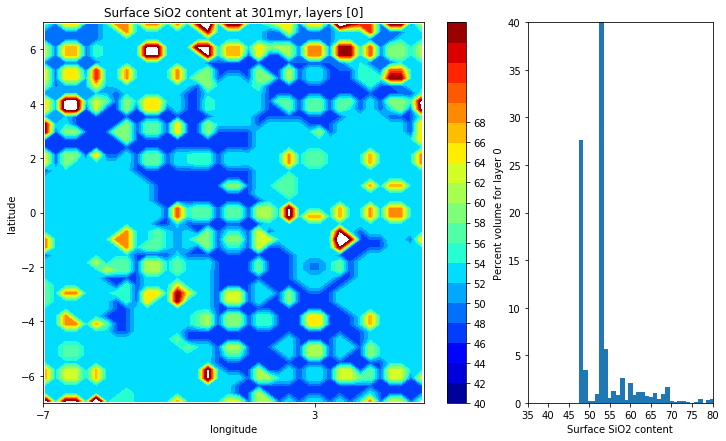

45          NaN
50     0.210526
58     2.631579
59     0.315789
65     0.578947
51     0.157895
55     0.473684
63     1.105263
49     3.421053
53    43.000000
54     5.684211
57     0.789474
72     0.210526
60     2.105263
69     1.684211
48    27.578947
71     0.105263
52     0.947368
70     0.210526
87          NaN
64     0.684211
74     0.105263
62     1.105263
56     1.263158
61     0.789474
66     1.052632
77     0.368421
67     0.368421
47          NaN
78          NaN
85     0.210526
68     0.947368
80     0.368421
83     0.263158
79     0.315789
95     0.105263
76     0.105263
94     0.052632
75          NaN
82     0.157895
81     0.315789
73     0.157895
91     0.052632
Name: 300, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


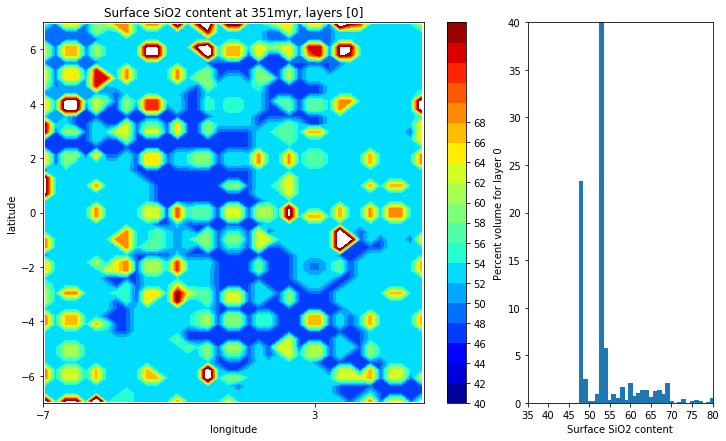

45           NaN
50      0.210526
58      1.684211
59      0.315789
65      0.631579
51      0.157895
55      0.315789
63      1.315789
49      2.526316
53     47.210526
54      5.736842
57      0.473684
72      0.105263
60      2.105263
69      2.105263
48     23.315789
71           NaN
52      0.947368
70      0.157895
87           NaN
64      1.368421
74           NaN
62      1.000000
56      0.947368
61      0.736842
66      1.263158
77      0.210526
67      1.368421
47           NaN
78           NaN
85      0.263158
68      0.947368
80      0.526316
83      0.157895
79      0.105263
95           NaN
76      0.263158
94      0.052632
75      0.210526
82      0.052632
81      0.210526
73      0.368421
91      0.368421
100     0.052632
86      0.105263
90      0.105263
Name: 350, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


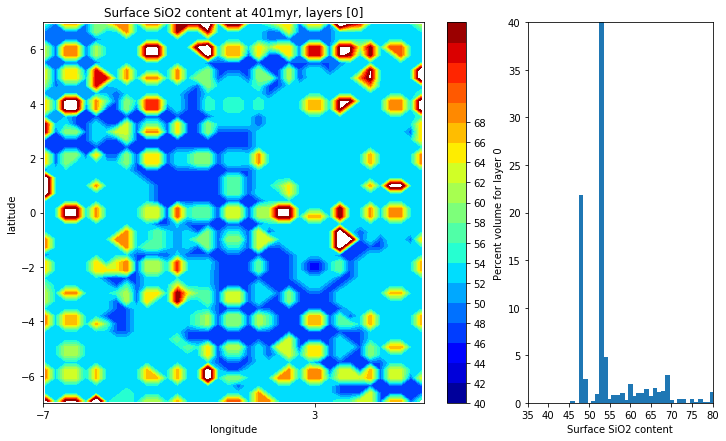

45           NaN
50           NaN
58      1.052632
59      0.315789
65      0.684211
51      0.157895
55      0.421053
63      1.052632
49      2.526316
53     47.368421
54      4.789474
57      0.789474
72      0.368421
60      2.000000
69      2.947368
48     21.842105
71           NaN
52      0.947368
70      0.315789
87      0.105263
64      1.421053
74           NaN
62      1.000000
56      0.842105
61      0.736842
66      1.578947
77      0.368421
67      1.157895
47           NaN
78      0.105263
85      0.210526
68      1.263158
80      1.157895
83      0.052632
79      0.105263
95           NaN
76      0.105263
94      0.052632
75      0.421053
82      0.052632
81      0.210526
73      0.368421
91      0.368421
100     0.052632
86      0.105263
90      0.105263
89      0.263158
46      0.210526
Name: 400, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


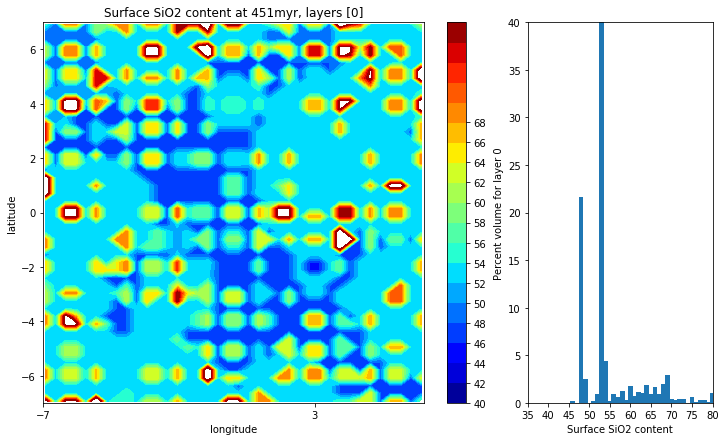

45           NaN
50           NaN
58      1.210526
59      0.315789
65      0.894737
51      0.157895
55      0.210526
63      1.052632
49      2.526316
53     46.315789
54      4.421053
57      0.631579
72      0.368421
60      1.736842
69      2.947368
48     21.631579
71      0.263158
52      0.947368
70      0.421053
87      0.105263
64      1.842105
74           NaN
62      1.105263
56      0.947368
61      0.736842
66      1.631579
77      0.263158
67      0.894737
47           NaN
78      0.315789
85      0.210526
68      1.947368
80      1.052632
83      0.157895
79      0.105263
95           NaN
76      0.105263
94      0.052632
75      0.578947
82      0.210526
81      0.210526
73      0.368421
91      0.368421
100     0.052632
86      0.105263
90      0.105263
89      0.263158
46      0.210526
Name: 450, dtype: float64
plotting SiO2  map for layers [0], and distribution for layer 0


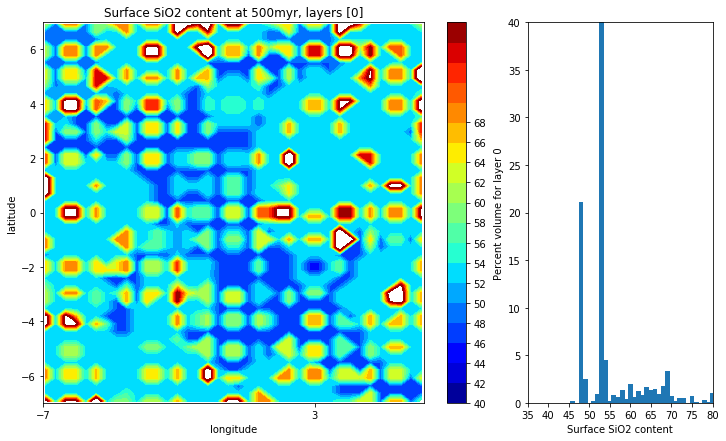

45           NaN
50           NaN
58      1.315789
59      0.421053
65      1.315789
51      0.157895
55      0.210526
63      0.842105
49      2.526316
53     45.052632
54      4.526316
57      0.631579
72      0.473684
60      2.000000
69      3.315789
48     21.157895
71      0.210526
52      0.947368
70      0.684211
87      0.421053
64      1.631579
74           NaN
62      1.263158
56      0.789474
61      0.631579
66      1.473684
77           NaN
67      0.947368
47           NaN
78      0.315789
85      0.210526
68      1.736842
80      1.000000
83      0.157895
79      0.105263
95           NaN
76      0.105263
94           NaN
75      0.736842
82      0.210526
81      0.315789
73      0.473684
91      0.157895
100     0.157895
86      0.105263
90           NaN
89      0.157895
46      0.210526
84      0.315789
97      0.210526
88      0.157895
99      0.105263
96      0.105263
Name: 499, dtype: float64


In [6]:
impact_boundz=7
[-impact_boundz, impact_boundz]
Impc = IMPAaCS(egrid, max_depth_of_impact_melt=330, 
               lon_lims = [-impact_boundz, impact_boundz], lat_lims = [-impact_boundz, impact_boundz])
# Loop through impacts, the df has them stored by time and diameter bn
for it, t in enumerate(df.index.values):
    start_time = time.time()
    for d in diam_labs:
        for i in range(int(df.loc[t,d])):

            # locate the the impacts on earth
            impact_lat = random.randrange(-90,90)
            impact_lon = random.randrange(-180,180)
            if np.abs(impact_lat) > impact_boundz:
                continue
            if np.abs(impact_lon) > impact_boundz:
                continue
            impact_loc = [impact_lat, impact_lon]
            impactor_diameter = random.randrange(diam_range[d][0],diam_range[d][1])
                
            #####      DO THE DYANMICS       #############################
            Impc.update(impact_loc, impactor_diameter, t)
            
    layer_perc_vol = 0
    Impc.do_percent_volume_by_layer() # The defauld n_layers is 1, so acting on layer 0
    
    if it == 0:
        percent_df = pd.DataFrame(Impc.percent_volume_by_layer[layer_perc_vol], index=[it])
    else:
        percent_df = percent_df.append(Impc.percent_volume_by_layer[layer_perc_vol], ignore_index=True)
            
    # make a map of the results at this time
    if it in list_impacts_export:
        Impc.plot_map_and_bar(plot_figure=True, save_figure=False,
                              map_layers=[layer_perc_vol], dist_layer=layer_perc_vol)
        print(percent_df.iloc[-1,:])

In [9]:
Impc.percent_volume_by_layer

{0: {45: 96.67203435319378, 50: 3.3279656468062266}}

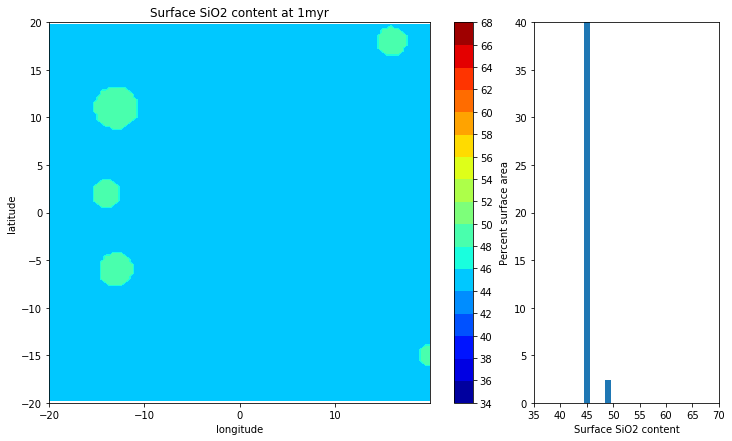

45    97.557703
49     2.442297
Name: 0, dtype: float64


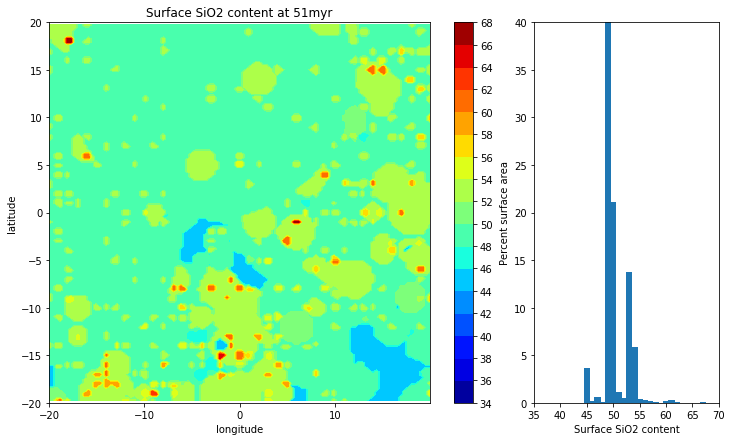

45     3.703704
49    51.583468
48     0.040258
50    21.061460
51     1.133924
53    13.714439
43     0.006710
46     0.140902
47     0.597155
54     5.817230
52     0.496511
56     0.281804
58     0.067096
55     0.389157
57     0.234836
41          NaN
61     0.328771
60     0.201288
64     0.020129
59     0.026838
62     0.093935
65     0.020129
67     0.040258
Name: 50, dtype: float64


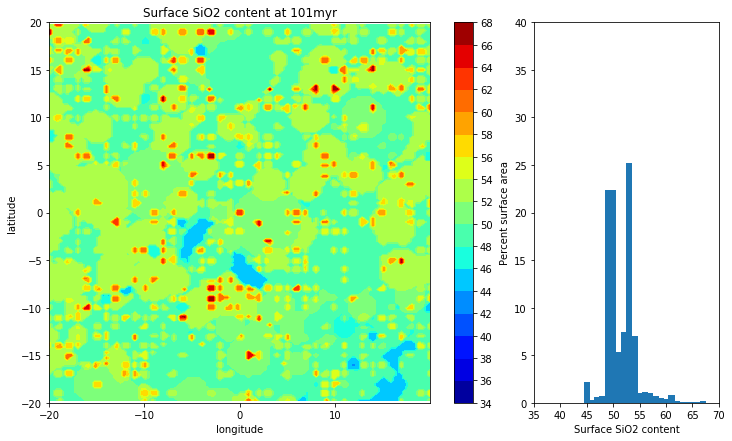

45     2.200751
49    22.376543
48     0.691090
50    22.376543
51     5.293881
53    25.221417
43     0.020129
46     0.328771
47     0.590446
54     7.031669
52     7.494632
56     1.140633
58     0.684380
55     0.986312
57     1.006441
41          NaN
61     0.872249
60     0.449544
64     0.067096
59     0.503221
62     0.207998
65     0.120773
67     0.167740
63     0.100644
42          NaN
66     0.040258
44     0.026838
Name: 100, dtype: float64


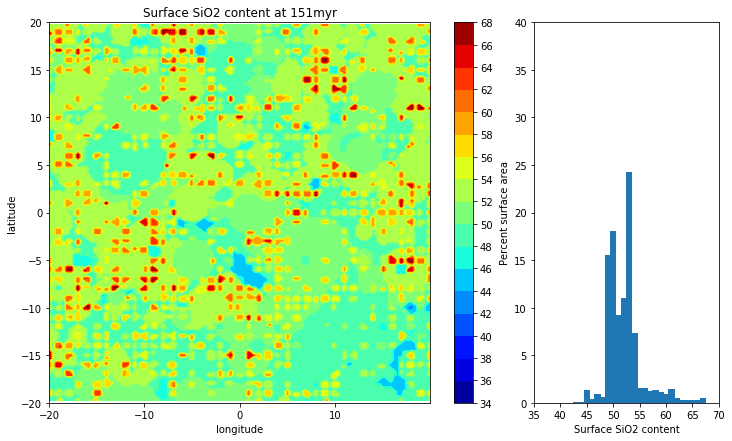

45     1.321793
49    15.499195
48     0.623994
50    18.048846
51     9.245840
53    24.261943
43     0.033548
46     0.429415
47     0.919216
54     7.347021
52    11.010467
56     1.509662
58     1.294954
55     1.549919
57     1.288245
41          NaN
61     1.435856
60     0.932636
64     0.248256
59     1.154053
62     0.489801
65     0.288513
67     0.509930
63     0.248256
42          NaN
66     0.268384
44     0.040258
Name: 150, dtype: float64


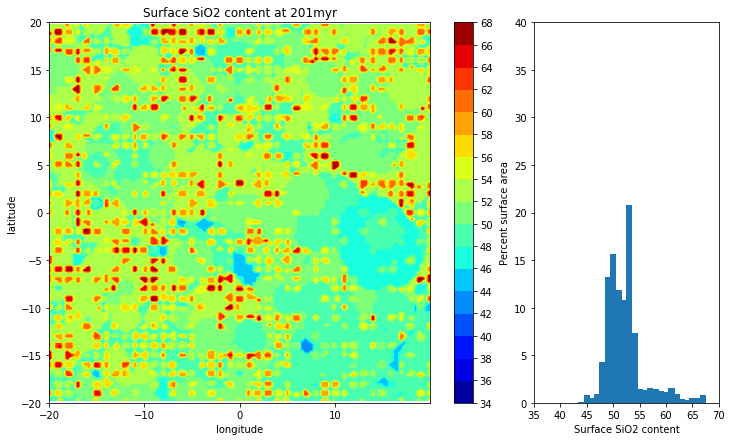

45     0.865539
49    13.238057
48     4.300859
50    15.687064
51    11.808910
53    20.806495
43     0.013419
46     0.476382
47     0.966184
54     7.333602
52    10.822598
56     1.355341
58     1.496243
55     1.476114
57     1.583468
41     0.013419
61     1.596887
60     1.180891
64     0.322061
59     1.261406
62     0.972893
65     0.536769
67     0.845411
63     0.389157
42          NaN
66     0.523349
44     0.127483
Name: 200, dtype: float64


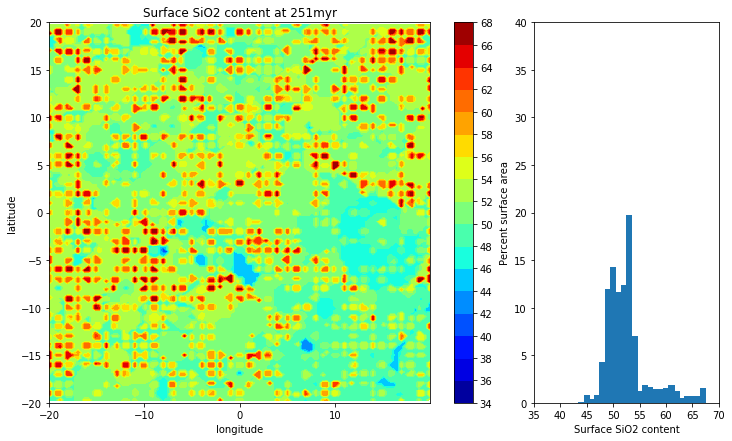

45     0.778315
49    11.916264
48     4.294149
50    14.325013
51    11.641170
53    19.759796
43     0.013419
46     0.429415
47     0.825282
54     6.971283
52    12.372517
56     1.831723
58     1.422437
55     1.281535
57     1.650564
41          NaN
61     1.912238
60     1.583468
64     0.691090
59     1.476114
62     1.214439
65     0.724638
67     1.536500
63     0.523349
42     0.006710
66     0.677670
44     0.120773
40     0.020129
Name: 250, dtype: float64


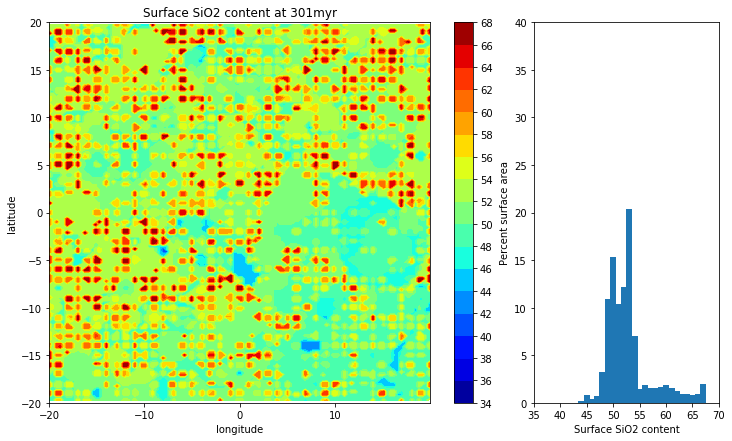

45     0.838701
49    10.869565
48     3.227322
50    15.378422
51    10.406602
53    20.363661
43     0.013419
46     0.422705
47     0.751476
54     7.058508
52    12.184648
56     1.865271
58     1.556629
55     1.409018
57     1.549919
41          NaN
61     1.596887
60     1.831723
64     0.946055
59     1.610306
62     1.207729
65     0.865539
67     1.986044
63     0.899087
42     0.006710
66     0.959474
44     0.174450
40     0.020129
Name: 300, dtype: float64


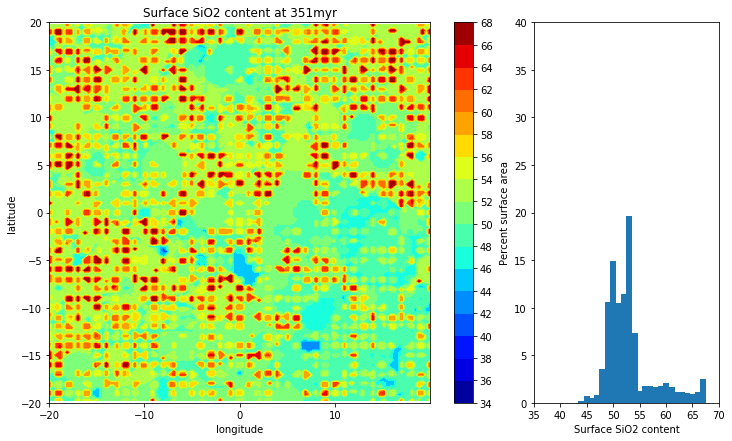

45     0.724638
49    10.621310
48     3.576221
50    14.861782
51    10.513956
53    19.585346
43     0.013419
46     0.462963
47     0.845411
54     7.380569
52    11.473430
56     1.791465
58     1.630435
55     1.201020
57     1.724369
41          NaN
61     1.643854
60     2.046430
64     1.053408
59     1.818304
62     1.160762
65     0.919216
67     2.489265
63     1.086957
42     0.006710
66     1.174181
44     0.174450
40     0.020129
Name: 350, dtype: float64


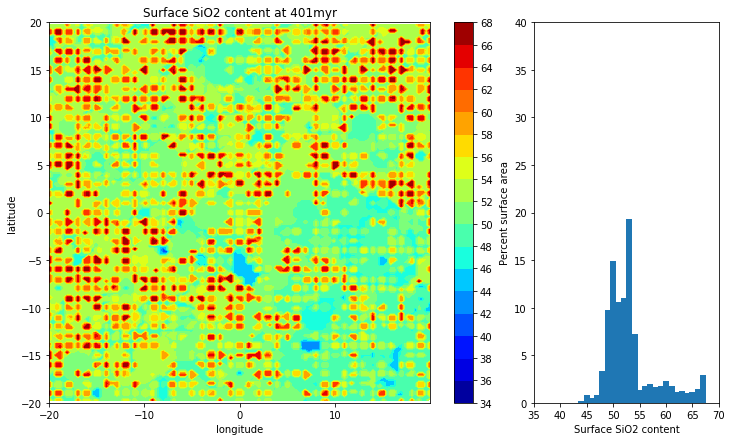

45     0.798443
49     9.775899
48     3.314546
50    14.888621
51    10.607890
53    19.283414
43     0.013419
46     0.483092
47     0.865539
54     7.219538
52    11.064144
56     1.764627
58     1.650564
55     1.294954
57     1.979334
41          NaN
61     1.778046
60     2.254428
64     1.053408
59     1.791465
62     1.154053
65     1.154053
67     2.911970
63     1.207729
42     0.006710
66     1.482823
44     0.181159
40     0.020129
Name: 400, dtype: float64


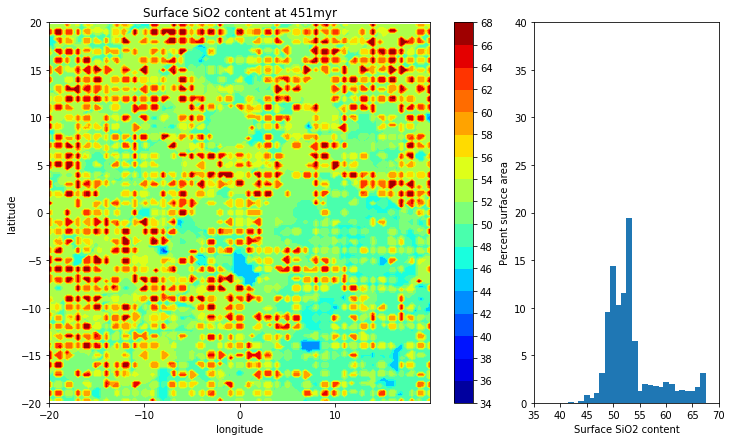

45     0.818572
49     9.534353
48     3.160225
50    14.385400
51    10.332797
53    19.410896
43          NaN
46     0.496511
47     0.979603
54     6.541868
52    11.567364
56     1.939077
58     1.798175
55     1.241278
57     1.845142
41     0.013419
61     1.965915
60     2.180623
64     1.274826
59     1.690821
62     1.227858
65     1.261406
67     3.166935
63     1.321793
42     0.033548
66     1.617016
44     0.174450
40     0.020129
Name: 450, dtype: float64


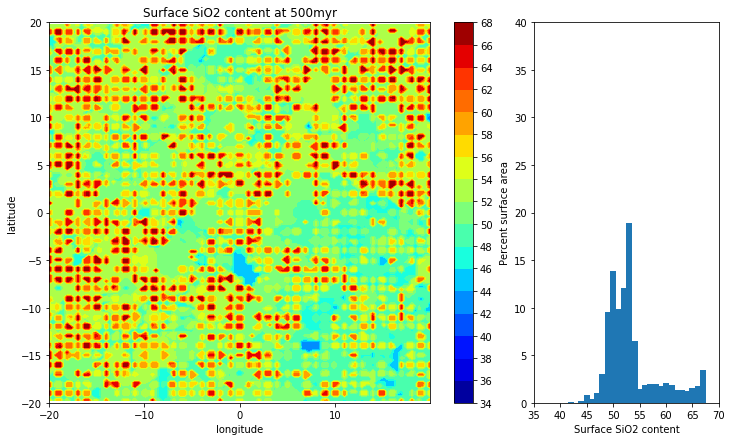

45     0.818572
49     9.507515
48     3.066291
50    13.875470
51     9.876543
53    18.867418
43          NaN
46     0.429415
47     1.039989
54     6.461353
52    12.050456
56     1.912238
58     1.999463
55     1.409018
57     1.979334
41     0.013419
61     1.912238
60     2.126946
64     1.274826
59     1.737789
62     1.308374
65     1.543210
67     3.468867
63     1.328502
42     0.033548
66     1.784756
44     0.174450
40          NaN
Name: 499, dtype: float64


In [17]:
impact_boundz=20
[-impact_boundz, impact_boundz]
Impc = IMPAaCS(egrid, max_depth_of_impact_melt=330, 
               lon_lims = [-impact_boundz, impact_boundz], lat_lims = [-impact_boundz, impact_boundz])
# Loop through impacts, the df has them stored by time and diameter bn
for it, t in enumerate(df.index.values):
    start_time = time.time()
    for d in diam_labs:
        for i in range(int(df.loc[t,d])):

            # locate the the impacts on earth
            impact_lat = random.randrange(-90,90)
            impact_lon = random.randrange(-180,180)
            if np.abs(impact_lat) > impact_boundz:
                continue
            if np.abs(impact_lon) > impact_boundz:
                continue
            impact_loc = [impact_lat, impact_lon]
            impactor_diameter = random.randrange(diam_range[d][0],diam_range[d][1])
                
            #####      DO THE DYANMICS       #############################
            Impc.update(impact_loc, impactor_diameter, t)
            
    Impc.do_sample_percents(n_layers=2)
    
    if it == 0:
        percent_df = pd.DataFrame(Impc.sample_percents, index=[it])
    else:
        percent_df = percent_df.append(Impc.sample_percents, ignore_index=True)
            
    # make a map of the results at this time
    if it in list_impacts_export:
        Impc.plot_map_and_bar(plot_figure=True)
        print(percent_df.iloc[-1,:])

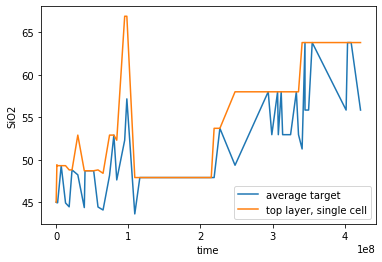

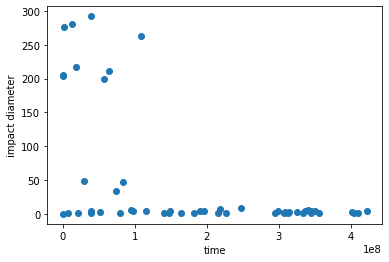

In [7]:
plt.plot(Impc.test_time, Impc.average_test_target_list)
plt.plot(Impc.test_time, Impc.top_layer_at_test_cell)
plt.legend(["average target", "top layer, single cell"])
plt.xlabel("time")
plt.ylabel("SiO2")
plt.show()
plt.close()
plt.scatter(Impc.test_time, Impc.impactors_at_test_cell)
plt.ylabel("impact diameter")
plt.xlabel("time")
plt.show()
plt.close()

In [15]:
### This is only a test. I am forcing impacts at one location to test the dynamics
### This is only a test. I am forcing impacts at one location to test the dynamics
### This is only a test. I am forcing impacts at one location to test the dynamics
print("This is only a test. I am forcing impacts at one location to test the dynamics")
print("This is only a test. I am forcing impacts at one location to test the dynamics")
I = IMPAaCS(egrid)
I.__init__(egrid)
impact_test_diameters = [330, 73, 16, 10, 5, 2, 330, 73, 16, 10, 5, 2]
# Loop through impacts, the df has them stored by time and diameter bn
for it, t in enumerate(df.index.values):
    print('time', it)
    for d in diam_labs[3:]:
        for i in range(int(df.loc[t,d])):

            # locate the the impacts on earth
            impact_lat = random.randrange(-90,90)
            impact_lon = random.randrange(-180,180)
            impact_loc = [impact_lat, impact_lon]

            # Specify the diameter within the bin
            if it < len(impact_test_diameters):                  # Test scenario
                impactor_diameter = impact_test_diameters[it]    # Test scenario
                impact_lat = 0.18672199                             # Test scenario
                impact_lon = 0.14122179                            # Test scenario
                impact_loc = [impact_lat, impact_lon]            # Test scenario
            else:                                                # Test scenario
                impactor_diameter = random.randrange(diam_range[d][0],diam_range[d][1])
                
            #####      DO THE DYANMICS       #############################
            I.update(impact_loc, impactor_diameter, t)

            break  # Test scenario

        if it < len(impact_test_diameters):   # Test scenario
            print("This is only a test. I am forcing impacts at one location to test the dynamics")
            print('{} diameter IMPAaC at Test cell: {}'.format(impactor_diameter, 
                                                               I.impact_test_id))
            print('average_target: {}, across {} grid cells'.format(np.round(I.average_target,1), 
                                                            len(I.impacted_grid_cells)))
            print("SiO2 states:")
            print(list(I.grid_cell_state[I.impact_test_id])[0:75])
            print(" ")
        break  # Test scenario

    if it > len(impact_test_diameters):  # Test scenario
        break  # Test scenario

This is only a test. I am forcing impacts at one location to test the dynamics
This is only a test. I am forcing impacts at one location to test the dynamics
time 0
This is only a test. I am forcing impacts at one location to test the dynamics
330 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 45.0, across 6516 grid cells
SiO2 states:
[49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]
 
time 1
This is only a test. I am forcing impacts at one location to test the dynamics
73 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 49.0, across 320 grid cells
SiO2 states:
[53.8, 

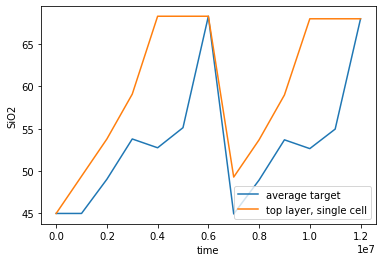

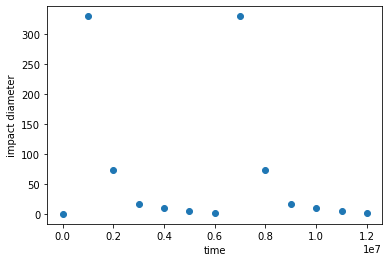

In [16]:
plt.plot(I.test_time, I.average_test_target_list)
plt.plot(I.test_time, I.top_layer_at_test_cell)
plt.legend(["average target", "top layer, single cell"])
plt.xlabel("time")
plt.ylabel("SiO2")
plt.show()
plt.close()
plt.scatter(I.test_time, I.impactors_at_test_cell)
plt.ylabel("impact diameter")
plt.xlabel("time")
plt.show()
plt.close()

# 10 X impacts teste cast

In [20]:
### This is only a test. I am forcing impacts at one location to test the dynamics
### This is only a test. I am forcing impacts at one location to test the dynamics
### This is only a test. I am forcing impacts at one location to test the dynamics
print("This is only a test. I am forcing impacts at one location to test the dynamics")
print("This is only a test. I am forcing impacts at one location to test the dynamics")
I = IMPAaCS(egrid, bound_sio2=True)
I.__init__(egrid)
impact_test_diameters = [330, 330, 330, 330, 330, 330, 330, 330, 330, 330,
                         73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
                         16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 
                         10, 10,  10,  10,  10,  10,  10,  10,  10,  10, 
                         5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                         2, 2, 2, 2, 2, 2, 2, 2, 2, 2,]
# Loop through impacts, the df has them stored by time and diameter bn
for it, t in enumerate(df.index.values):
    print('time', it)
    for d in diam_labs[3:]:
        for i in range(int(df.loc[t,d])):

            # locate the the impacts on earth
            impact_lat = random.randrange(-90,90)
            impact_lon = random.randrange(-180,180)
            impact_loc = [impact_lat, impact_lon]

            # Specify the diameter within the bin
            if it < len(impact_test_diameters):                  # Test scenario
                impactor_diameter = impact_test_diameters[it]    # Test scenario
                impact_lat = 0.18672199                             # Test scenario
                impact_lon = 0.14122179                            # Test scenario
                impact_loc = [impact_lat, impact_lon]            # Test scenario
            else:                                                # Test scenario
                impactor_diameter = random.randrange(diam_range[d][0],diam_range[d][1])
                
            #####      DO THE DYANMICS       #############################
            I.update(impact_loc, impactor_diameter, t)

            break  # Test scenario

        if it < len(impact_test_diameters):   # Test scenario
            print("This is only a test. I am forcing impacts at one location to test the dynamics")
            print('{} diameter IMPAaC at Test cell: {}'.format(impactor_diameter, 
                                                               I.impact_test_id))
            print('average_target: {}, across {} grid cells'.format(np.round(I.average_target,1), 
                                                            len(I.impacted_grid_cells)))
            print("SiO2 states:")
            print(list(I.grid_cell_state[I.impact_test_id])[0:75])
            print(" ")
        break  # Test scenario

    if it > len(impact_test_diameters):  # Test scenario
        break  # Test scenario

This is only a test. I am forcing impacts at one location to test the dynamics
This is only a test. I am forcing impacts at one location to test the dynamics
time 0
This is only a test. I am forcing impacts at one location to test the dynamics
330 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 45.0, across 6516 grid cells
SiO2 states:
[49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]
 
time 1
This is only a test. I am forcing impacts at one location to test the dynamics
330 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 44.9, across 6516 grid cells
SiO2 states:
[49.3

This is only a test. I am forcing impacts at one location to test the dynamics
73 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 48.8, across 320 grid cells
SiO2 states:
[53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]
 
time 14
This is only a test. I am forcing impacts at one location to test the dynamics
73 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 48.8, across 320 grid cells
SiO2 states:
[53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3

This is only a test. I am forcing impacts at one location to test the dynamics
16 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 52.7, across 15 grid cells
SiO2 states:
[57.9, 42.4, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]
 
time 27
This is only a test. I am forcing impacts at one location to test the dynamics
16 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 52.7, across 15 grid cells
SiO2 states:
[57.9, 42.4, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 

This is only a test. I am forcing impacts at one location to test the dynamics
10 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 56.6, across 6 grid cells
SiO2 states:
[79.7, 42.4, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]
 
time 40
This is only a test. I am forcing impacts at one location to test the dynamics
5 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 58.6, across 1 grid cells
SiO2 states:
[79.7, 42.4, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.

This is only a test. I am forcing impacts at one location to test the dynamics
2 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 79.7, across 1 grid cells
SiO2 states:
[79.7, 42.4, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 36.1, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]
 
time 53
This is only a test. I am forcing impacts at one location to test the dynamics
2 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 79.7, across 1 grid cells
SiO2 states:
[79.7, 42.4, 53.6, 53.6, 53.6, 53.6, 53.6, 53.6, 39.2, 39.2, 39.2, 39.2, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3, 49.3

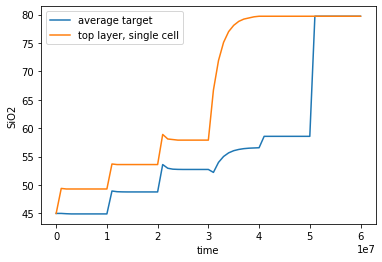

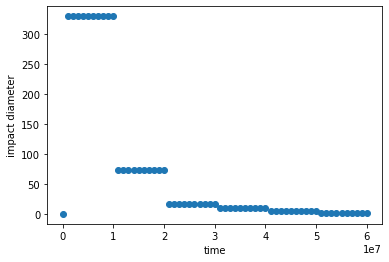

In [21]:
plt.plot(I.test_time, I.average_test_target_list)
plt.plot(I.test_time, I.top_layer_at_test_cell)
plt.legend(["average target", "top layer, single cell"])
plt.xlabel("time")
plt.ylabel("SiO2")
plt.show()
plt.close()
plt.scatter(I.test_time, I.impactors_at_test_cell)
plt.ylabel("impact diameter")
plt.xlabel("time")
plt.show()
plt.close()